In [25]:
import numpy as np
import numpy.linalg as LA
import math
import matplotlib.pyplot as plt

from tkinter import Tk
from tkinter import filedialog as fd

In [26]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [27]:
root = Tk()
filename = fd.askopenfilename(title = "Choose the mobility file")
#filenames = list(filenames_tuple)
f = open(filename,'r')

filename = fd.askopenfilename(title = "Choose the angle file")
g = open(filename,'r')
root.withdraw()

resistanceList = []
for line in f:
    newline = line.split()
    if is_number(newline[0][0]):
        #print(newline)
        resistanceList.append([float(newline[1]),float(newline[2])])  
        
print(len(resistanceList))
for counter, line in enumerate(g):
    newline = line.split()
    resistanceList[counter].append(float(newline[1]))

500


Found zero eigenvalue, iterator is: 0
Found zero eigenvalue, iterator is: 1
Found zero eigenvalue, iterator is: 2
Found zero eigenvalue, iterator is: 3
Found zero eigenvalue, iterator is: 4
Found zero eigenvalue, iterator is: 5
Found zero eigenvalue, iterator is: 6
Found zero eigenvalue, iterator is: 7
Found zero eigenvalue, iterator is: 8
Found zero eigenvalue, iterator is: 9
Found zero eigenvalue, iterator is: 10
Found zero eigenvalue, iterator is: 11
Found zero eigenvalue, iterator is: 12
Found zero eigenvalue, iterator is: 13
Found zero eigenvalue, iterator is: 14
Found zero eigenvalue, iterator is: 15
Found zero eigenvalue, iterator is: 16
Found zero eigenvalue, iterator is: 17
Found zero eigenvalue, iterator is: 18
Found zero eigenvalue, iterator is: 19
Resistance is: 0.401518 +- 0.012147 Ohms
Mobility is: 2.517732 cm^2/Vs


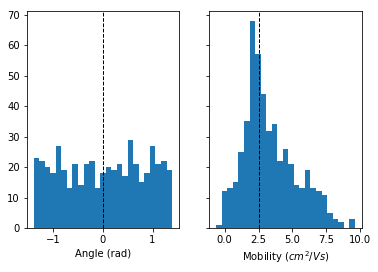

In [28]:
l = 15
size = l**2 + 2
n = 3*.002*(10**21)
e = 1.602*(10**(-19))

R_total = []
r_cut = 450
iterations = 20

for iterator in range(0,iterations):
    rIndex = np.random.randint(0,r_cut)
    R = 0
    
    C = np.zeros((size, size))
    over_count = 0

    #fill C_array
    for i in range(0,size - 1):
        for j in range(0,size - 1):
            if j == i:
                over_r = 0
            else:
                over_r = n*e*resistanceList[rIndex][0]

            #bottom node:
            if i==0 and j<= l and i!=j:
                C[i][j] -= over_r
                C[j][i] -= over_r

                C[i][i] += over_r
                C[j][j] += over_r

                rIndex += 1

            #intermediate nodes
            if (j == i+1 and i%l != 0) or j == i + l:
                if C[i][j] == 0:
                    C[i][j] -= over_r
                    C[j][i] -= over_r

                    C[i][i] += over_r
                    C[j][j] += over_r

                    rIndex += 1

            #top node
            if i >= size - l - 1:
                if C[i][size - 1] == 0:
                    over_r = n*e*resistanceList[rIndex][0]

                    C[i][size - 1] -= over_r
                    C[size-1][i] -= over_r

                    C[i][i] += over_r
                    C[size-1][size-1] += over_r

                    rIndex += 1

            if rIndex >= r_cut:
                rIndex -= r_cut
                over_count += 1

                if over_count > 1:
                    print("lowered resistance index too many times")

    (w,v)=LA.eig(C)   

    #count=0
    for i in range(0,size):
        if w[i] >= 10**-10:
            R+=(1/w[i])*np.abs(v[0][i]-v[size-1][i])**2
            
        else:
        #    count+=1
            print("Found zero eigenvalue, iterator is: %i"%iterator)
            
    R_total.append(R)

R_total_array = np.asarray(R_total)
mean = R_total_array.mean()
std = np.std(R_total_array)


print("Resistance is: %f +- %f Ohms"%(mean,std))

conductivity = 1/R
mobility = conductivity/(n*e)
print("Mobility is: %f cm^2/Vs"%mobility)

#use kernal density estimation

#################
#plot histograms#
#################

n_bins = 25
r_values = np.asarray([i[0] for i in resistanceList])
a_values = np.asarray([i[2] for i in resistanceList])

fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(a_values, bins=n_bins)
axs[0].axvline(a_values.mean(), color = 'k', linestyle = 'dashed',linewidth = 1)
axs[0].set_xlabel("Angle (rad)")
axs[1].hist(r_values, bins=n_bins)
axs[1].axvline(mobility, color='k', linestyle='dashed', linewidth=1)
axs[1].set_xlabel("Mobility ($cm^{2}/Vs$)")
plt.show()